<a href="https://colab.research.google.com/github/NgoMinhQuang/BaiTapAI_CNN/blob/main/CNN_cifar100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#import library
from keras.layers.core.dropout import Dropout
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.datasets import cifar100
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop, SGD
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
import matplotlib.pyplot as plt

In [3]:
#Chia dữ liệu
(x_train, y_train),(x_test,y_test) = cifar100.load_data()

print('Kích thước x_train: ', x_train.shape)
print('Kích thước y_train: ', y_train.shape)
print('Kích thước x_test: ', x_test.shape)
print('Kích thước y_test: ', y_test.shape)

169017344/169001437 [==============================] - 2s 0us/step
Kích thước x_train:  (50000, 32, 32, 3)
Kích thước y_train:  (50000, 1)
Kích thước x_test:  (10000, 32, 32, 3)
Kích thước y_test:  (10000, 1)


In [4]:
#Chuẩn hóa dữ liệu
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train/255
x_test = x_test/255

y_train = np_utils.to_categorical(y_train,100)
y_test = np_utils.to_categorical(y_test,100)

print('Kích thước x_train: ', x_train.shape)
print('Kích thước y_train: ', y_train.shape)
print('Kích thước x_test: ', x_test.shape)
print('Kích thước y_test: ', y_test.shape)

Kích thước x_train:  (50000, 32, 32, 3)
Kích thước y_train:  (50000, 100)
Kích thước x_test:  (10000, 32, 32, 3)
Kích thước y_test:  (10000, 100)


In [14]:
#train model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(32, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(100, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 7200)              0         
                                                                 
 dense_2 (Dense)             (None, 32)                230432    
                                                                 
 dense_3 (Dense)             (None, 100)               3300      
                                                                 
Total params: 234,628
Trainable params: 234,628
Non-trainable params: 0
________________________________________________

In [15]:
# compile model
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
from keras.callbacks import EarlyStopping
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test), 
                    verbose=1, callbacks=[EarlyStopping(monitor='val_loss',patience=50)])

Epoch 1/100
1563/1563 [==============================] - 42s 26ms/step - loss: 4.6071 - accuracy: 0.0094 - val_loss: 4.6053 - val_accuracy: 0.0100
Epoch 2/100
1563/1563 [==============================] - 40s 26ms/step - loss: 4.6064 - accuracy: 0.0088 - val_loss: 4.6053 - val_accuracy: 0.0100
Epoch 3/100
1563/1563 [==============================] - 40s 26ms/step - loss: 4.6061 - accuracy: 0.0096 - val_loss: 4.6047 - val_accuracy: 0.0106
Epoch 4/100
1563/1563 [==============================] - 42s 27ms/step - loss: 4.5185 - accuracy: 0.0153 - val_loss: 4.4406 - val_accuracy: 0.0218
Epoch 5/100
1563/1563 [==============================] - 40s 26ms/step - loss: 4.2544 - accuracy: 0.0350 - val_loss: 4.1296 - val_accuracy: 0.0489
Epoch 6/100
1563/1563 [==============================] - 39s 25ms/step - loss: 3.9150 - accuracy: 0.0826 - val_loss: 3.7441 - val_accuracy: 0.1196
Epoch 7/100
1563/1563 [==============================] - 39s 25ms/step - loss: 3.6299 - accuracy: 0.1333 - val_loss: 3

In [16]:
model.save('CNN_cifar100.h5')

Sai số kiểm tra là:  7.824943542480469
Độ chính xác kiểm tra là:  0.19619999825954437


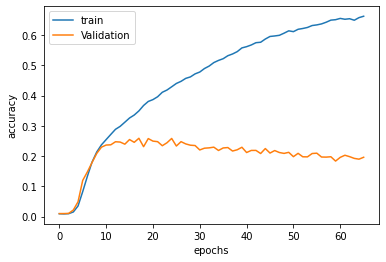

In [17]:
score = model.evaluate(x_test,y_test,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('Độ chính xác kiểm tra là: ',score[1])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','Validation'])
plt.show()